In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
file_path = "ms-pv-2006/Actual_30.25_-89.45_2006_UPV_118MW_5_Min.csv"
data = pd.read_csv(file_path)

In [3]:
data['LocalTime'] = pd.to_datetime(data['LocalTime'], format='%m/%d/%y %H:%M')
data = data.rename(columns={'LocalTime': 'ds', 'Power(MW)': 'y'})

In [4]:
if data['y'].isnull().sum() > 0:
    data['y'].fillna(method='ffill', inplace=True)

data_hourly = data.resample('H', on='ds').mean().reset_index()

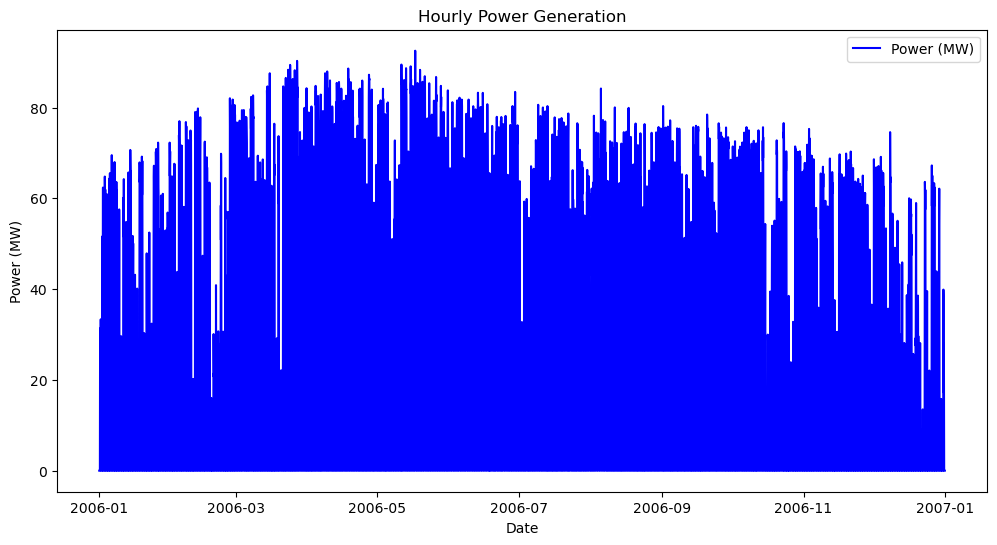

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data_hourly['ds'], data_hourly['y'], color='b', label='Power (MW)')
plt.xlabel('Date')
plt.ylabel('Power (MW)')
plt.title('Hourly Power Generation')
plt.legend()
plt.show()

In [6]:
model = Prophet(yearly_seasonality=True, daily_seasonality=True, weekly_seasonality=True)
model.fit(data_hourly)

17:51:49 - cmdstanpy - INFO - Chain [1] start processing
17:51:50 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = model.make_future_dataframe(periods=24*30, freq='H')
forecast = model.predict(future)

NameError: name 'fig' is not defined

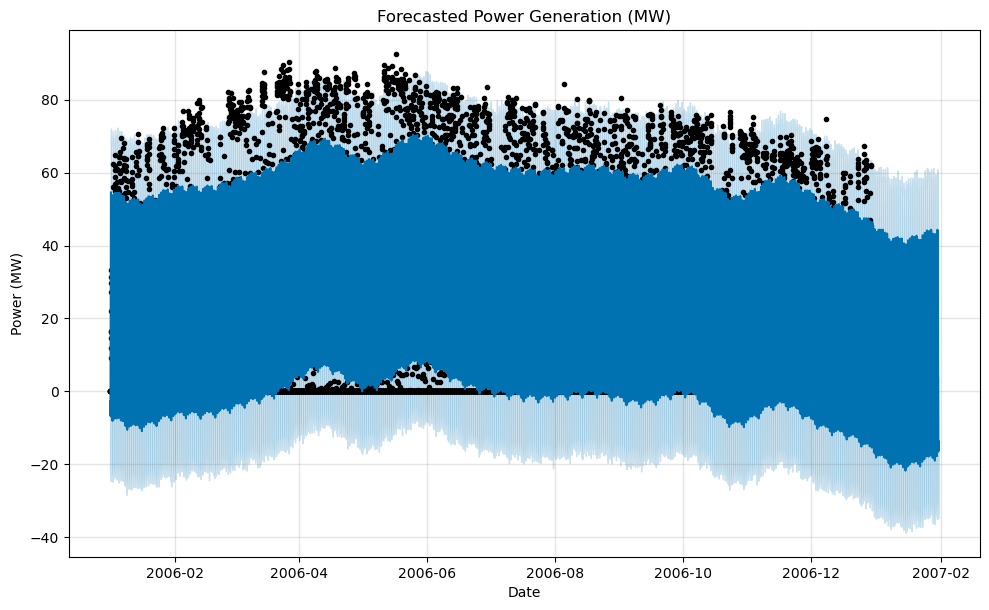

In [13]:
model.plot(forecast)
plt.title('Forecasted Power Generation (MW)')
plt.xlabel('Date')
plt.ylabel('Power (MW)')
forecast_line = fig.gca().lines[0]
forecast_line.set_label("Forecasted Power Generation")
historical_data_points = fig.gca().lines[1]
historical_data_points.set_label("Historical Data")
plt.legend(loc="lower left", fontsize=10)
plt.show()

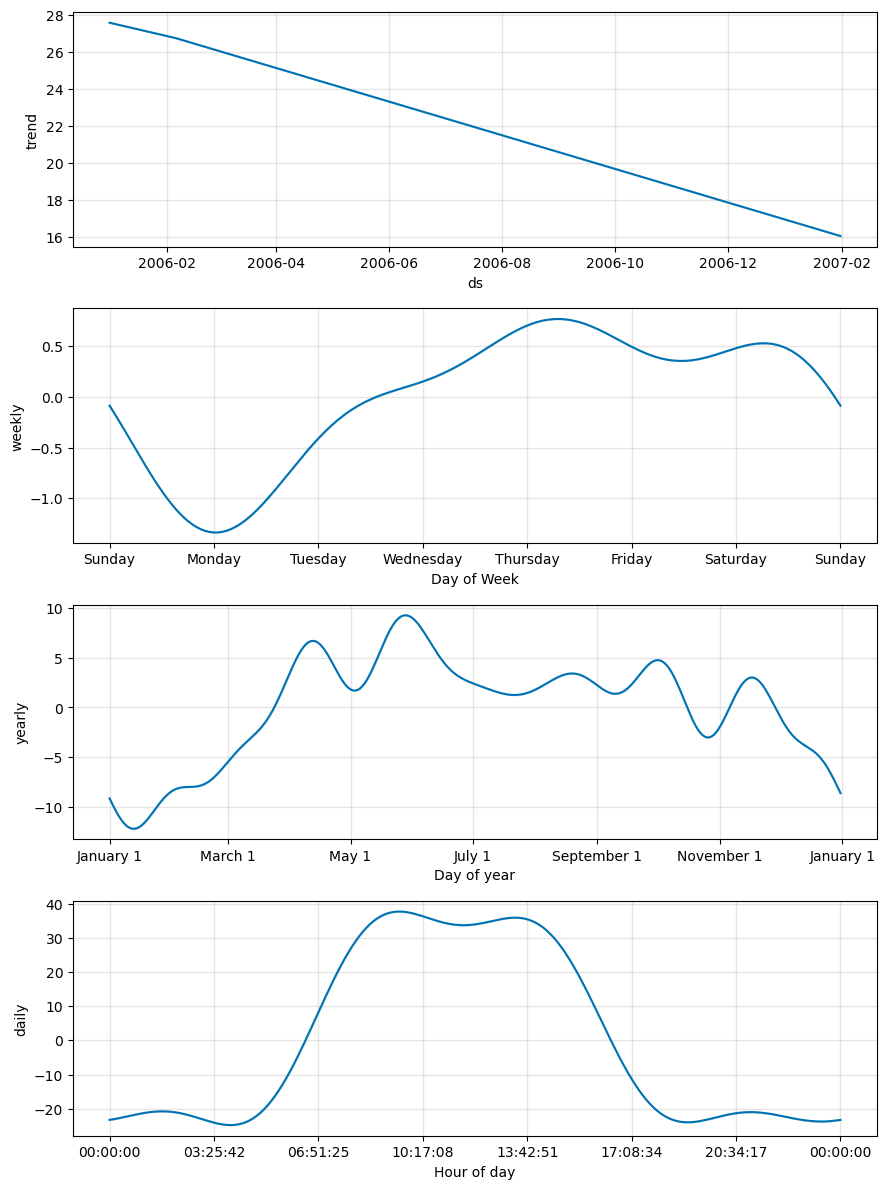

In [15]:
model.plot_components(forecast)
plt.show()

In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9475,2007-01-30 19:00:00,-16.506191,-34.780049,-0.048896
9476,2007-01-30 20:00:00,-14.872590,-31.749126,2.004045
9477,2007-01-30 21:00:00,-13.502361,-31.733713,3.810981
9478,2007-01-30 22:00:00,-14.489069,-30.697094,1.742956
9479,2007-01-30 23:00:00,-16.035116,-33.209874,0.321010
